In [1]:


import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(threshold=np.inf)

import time, sys, random, pylab
from math import fabs

from random import randrange
from random import choice

from hrr import *

from IPython.display import clear_output
from sys import argv

# 13243
seed_val = 13243

In [2]:
import os
import glob
from os import path

files = glob.glob('plots/*')
for f in files:
    os.remove(f)
    
if path.exists('outputName.gif'):
    os.remove('outputName.gif')

In [3]:


def seed(seed):
    random.seed(seed)
    np.random.seed(seed)

In [4]:


seed(seed_val)

In [5]:


def plot_all_graphs(save=False, iteration=0):
    get_ipython().run_line_magic('matplotlib', 'inline')
    fig, axes = plt.subplots(nrows=num_of_atrs, ncols=num_obs_tasks+1)
    fig.set_figwidth(15)
    fig.set_figheight(15)
    plt.rcParams.update({'font.size': 14})
    
    if num_of_atrs > 1:
        for x in range(num_of_atrs):
            x_ind = x
            y_for_rwd = 0
            y_for_no_rwd = 0

            for wm in list(dict.fromkeys([signal + "In" if signal != "I" else signal for signal in signals] + ["I"])):
                position = np.arange(size_of_maze)
#                 value = np.zeros(size_of_maze)
#                 for signal in signals + ["I"]:
#                     lab = "WM:" + wm + "*Signal:" + signal + reward_tkn() + "*Atr:" + str(x)
#                     for state in range(size_of_maze):
#                         encode_str = build_hrr_string(wm, signal, str(state) + "*rewardTkn", x)
#                         value[state] = np.dot(weights, ltm.encode(encode_str)) + bias
#                     axes[x_ind,y_for_rwd].title.set_text(wm + " with rewardTkn " + "Atr: " + str(x))
#                     axes[x_ind,y_for_rwd].plot(position, value, label=lab)
#                     axes[x_ind,y_for_no_rwd].tick_params(direction='out', length=6, width=2,
#                        grid_color='r', grid_alpha=0.5)
#                     axes[x_ind,y_for_rwd].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#                           fancybox=True, shadow=True, ncol=1, prop={'size': 10})
#                 y_for_rwd += 1

                y = x + 1
                value = np.zeros(size_of_maze)
                for signal in list(dict.fromkeys(signals + ["I"])):
                    lab = "WM:" + wm + "*Signal:" + signal + "*Atr:" + str(x)
                    for state in range(size_of_maze):
                        encode_str = build_hrr_string(wm, signal, str(state), x)
                        value[state] = np.dot(weights, ltm.encode(encode_str)) + bias
                    axes[x_ind,y_for_no_rwd].title.set_text(wm + " Atr: " + str(x))
                    axes[x_ind,y_for_no_rwd].plot(position, value, label=lab)
                    axes[x_ind,y_for_no_rwd].tick_params(direction='out', length=6, width=2,
                       grid_color='r', grid_alpha=0.5)
                    axes[x_ind,y_for_no_rwd].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                          fancybox=True, shadow=True, ncol=1, prop={'size': 10})
                y_for_no_rwd += 1
                
    else:
        for x in range(num_of_atrs):
            x_ind = x
            y_for_rwd = 0
            y_for_no_rwd = 0

            for wm in list(dict.fromkeys([signal + "In" if signal != "I" else signal for signal in signals] + ["I"])):
                position = np.arange(size_of_maze)
#                 value = np.zeros(size_of_maze)
#                 for signal in signals + ["I"]:
#                     lab = "WM:" + wm + "*Signal:" + signal + reward_tkn() + "*Atr:" + str(x)
#                     for state in range(size_of_maze):
#                         encode_str = build_hrr_string(wm, signal, str(state) + "*rewardTkn", x)
#                         value[state] = np.dot(weights, ltm.encode(encode_str)) + bias
#                     axes[y_for_no_rwd].title.set_text(wm + " with rewardTkn " + "Atr: " + str(x))
#                     axes[y_for_no_rwd].plot(position, value, label=lab)
#                     axes[y_for_no_rwd].tick_params(direction='out', length=6, width=2,
#                        grid_color='r', grid_alpha=0.5)
#                     axes[y_for_no_rwd].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#                           fancybox=True, shadow=True, ncol=1, prop={'size': 10})
#                 y_for_rwd += 1

                y = x + 1
                value = np.zeros(size_of_maze)
                for signal in list(dict.fromkeys(signals + ["I"])):
                    lab = "WM:" + wm + "*Signal:" + signal + "*Atr:" + str(x)
                    for state in range(size_of_maze):
                        encode_str = build_hrr_string(wm, signal, str(state), x)
                        value[state] = np.dot(weights, ltm.encode(encode_str)) + bias
                    axes[y_for_no_rwd].title.set_text(wm + " Atr: " + str(x))
                    axes[y_for_no_rwd].plot(position, value, label=lab)
                    axes[y_for_no_rwd].tick_params(direction='out', length=6, width=2,
                       grid_color='r', grid_alpha=0.5)
                    axes[y_for_no_rwd].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                          fancybox=True, shadow=True, ncol=1, prop={'size': 10})
                y_for_no_rwd += 1

    plt.title(iteration)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save:
        plt.savefig("plots/run_{0}".format(iteration), dpi=fig.dpi)
    else:
        plt.show()
    
def plot_graph(data):
    get_ipython().run_line_magic('matplotlib', 'inline')
    plt.plot(data)
    plt.show()
    
def live_graphs():
    get_ipython().run_line_magic('matplotlib', 'qt')
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "g", "b", "y"]) 
    fig, axes = plt.subplots(nrows=num_of_atrs, ncols=num_obs_tasks+1)
    
    if num_of_atrs > 1:
        for x in range(num_of_atrs):
            x_ind = x
            y_for_no_rwd = 0
            for wm in list(dict.fromkeys([signal + "In" if signal != "I" else signal for signal in signals] + ["I"])):
                position = np.arange(size_of_maze)
                value = np.zeros(size_of_maze)
                for signal in list(dict.fromkeys(signals + ["I"])):
                    lab = "WM:" + wm + "*Signal:" + signal + "*Atr:" + str(x)
                    for state in range(size_of_maze):
                        encode_str = build_hrr_string(wm, signal, str(state), x)
                        value[state] = np.dot(weights, ltm.encode(encode_str)) + bias
                    axes[x_ind,y_for_no_rwd].title.set_text(wm + " Atr: " + str(x))
                    axes[x_ind,y_for_no_rwd].plot(position, value, label=lab)
                    axes[x_ind,y_for_no_rwd].tick_params(direction='out', length=6, width=2,
                       grid_color='r', grid_alpha=0.5)
                    axes[x_ind,y_for_no_rwd].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                          fancybox=True, shadow=True, ncol=1, prop={'size': 10})
                y_for_no_rwd += 1
    else:
        for x in range(num_of_atrs):
            x_ind = x
            y_for_no_rwd = 0
            for wm in list(dict.fromkeys([signal + "In" if signal != "I" else signal for signal in signals] + ["I"])):
                position = np.arange(size_of_maze)
                value = np.zeros(size_of_maze)
                for signal in list(dict.fromkeys(signals + ["I"])):
                    lab = "WM:" + wm + "*Signal:" + signal + "*Atr:" + str(x)
                    for state in range(size_of_maze):
                        encode_str = build_hrr_string(wm, signal, str(state), x)
                        value[state] = np.dot(weights, ltm.encode(encode_str)) + bias
                    axes[y_for_no_rwd].title.set_text(wm + " Atr: " + str(x))
                    axes[y_for_no_rwd].plot(position, value, label=lab)
                    axes[y_for_no_rwd].tick_params(direction='out', length=6, width=2,
                       grid_color='r', grid_alpha=0.5)
                    axes[y_for_no_rwd].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                          fancybox=True, shadow=True, ncol=1, prop={'size': 10})
                y_for_no_rwd += 1 
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    ani = animation.FuncAnimation(fig, animate, interval=60000)
    plt.show()
    plt.suptitle("{0} Non-Observable tasks and {1} Observable tasks with goals: {2}".format(num_non_obs_tasks, num_obs_tasks, goals), fontsize=30)
    
def animate(i):
    if num_of_atrs > 1:
        for x in range(num_of_atrs):
            x_ind = x
            y_for_no_rwd = 0
            for wm in list(dict.fromkeys([signal + "In" if signal != "I" else signal for signal in signals] + ["I"])):
                position = np.arange(size_of_maze)
                value = np.zeros(size_of_maze)
                for signal in list(dict.fromkeys(signals + ["I"])):
                    lab = "WM:" + wm + "*Signal:" + signal + "*Atr:" + str(x)
                    for state in range(size_of_maze):
                        encode_str = build_hrr_string(wm, signal, str(state), x)
                        value[state] = np.dot(weights, ltm.encode(encode_str)) + bias
                    axes[x_ind,y_for_no_rwd].title.set_text(wm + " Atr: " + str(x))
                    axes[x_ind,y_for_no_rwd].plot(position, value, label=lab)
                    axes[x_ind,y_for_no_rwd].tick_params(direction='out', length=6, width=2,
                       grid_color='r', grid_alpha=0.5)
                    axes[x_ind,y_for_no_rwd].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                          fancybox=True, shadow=True, ncol=1, prop={'size': 10})
                y_for_no_rwd += 1
    else:
        for x in range(num_of_atrs):
            x_ind = x
            y_for_no_rwd = 0
            for wm in list(dict.fromkeys([signal + "In" if signal != "I" else signal for signal in signals] + ["I"])):
                position = np.arange(size_of_maze)
                value = np.zeros(size_of_maze)
                for signal in list(dict.fromkeys(signals + ["I"])):
                    lab = "WM:" + wm + "*Signal:" + signal + "*Atr:" + str(x)
                    for state in range(size_of_maze):
                        encode_str = build_hrr_string(wm, signal, str(state), x)
                        value[state] = np.dot(weights, ltm.encode(encode_str)) + bias
                    axes[y_for_no_rwd].title.set_text(wm + " Atr: " + str(x))
                    axes[y_for_no_rwd].plot(position, value, label=lab)
                    axes[y_for_no_rwd].tick_params(direction='out', length=6, width=2,
                       grid_color='r', grid_alpha=0.5)
                    axes[y_for_no_rwd].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                          fancybox=True, shadow=True, ncol=1, prop={'size': 10})
                y_for_no_rwd += 1
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [6]:


def update_progress(progress, episode):
    bar_length = 50
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Episode {0}, Progress: [{1}] {2:.1f}%".format(episode, "=" * block + "." * (bar_length - block), progress * 100)
    print(text)

In [7]:


def get_moves(state, size_of_maze):
    if(state == 0):
        return size_of_maze - 1, 1
    elif(state == size_of_maze - 1):
        return size_of_maze - 2, 0
    else:
        return state - 1, state + 1

In [8]:


def build_hrr_string(wm, signal, state, atr):
    if wm == "I" and signal == "I":
        return "State:" + str(state) + "*" + "Atr:" + str(atr)
    elif wm == "I":
        return "Signal:" + str(signal) + "*" + "State:" + str(state) + "*" + "Atr:" + str(atr)
    elif signal == "I":
        return "WM:" + str(wm) + "*" + "State:" + str(state) + "*" + "Atr:" + str(atr)
    else:
        return "WM:" + str(wm) + "*" + "Signal:" + str(signal) + "*" + "State:" + str(state) + "*" + "Atr:" + str(atr)

In [9]:


def context_policy_negative(atr):
    return np.random.randint(low=0, high=num_of_atrs)

def context_policy_positive(wm, signal, state, atr):
    val = -9999
    for atr in range(0, num_of_atrs):
        encode_str = build_hrr_string(wm, signal, state, atr)
        temp = np.dot(weights, ltm.encode(encode_str)) + bias
        if temp > val:
            val = temp
            s_atr = atr
    return s_atr

In [10]:


def reward_tkn():
    return "*rewardTkn"

In [11]:


def move_policy(goal, moves, wms, signals, atr, rand_on):
    val = -9999
    for move in moves:
        for wm in list(dict.fromkeys(wms + ["I"])):
            for signal in list(dict.fromkeys(signals + ["I"])):
                if move == goal:
                    encode_str = build_hrr_string(wm, signal, str(move) + reward_tkn(), atr)
                else:
                    encode_str = build_hrr_string(wm, signal, move, atr)
                if (debug):
                    print(encode_str)
                temp = np.dot(weights, ltm.encode(encode_str)) + bias
                if debug:
                    if signal != "I":
                        print("Move: {0}, WM: {1}, Signal: {2}In, Atr: {3}, Value: {4}".format(move, wm, signal, atr, temp))
                    else:
                        print("Move: {0}, WM: {1}, Signal: {2}, Atr: {3}, Value: {4}".format(move, wm, signal, atr, temp))
                if temp > val:
                    val = temp
                    s_move = move
                    if signal != "I":
                        s_wm = signal + "In"
                    else:
                        s_wm = wm
    if(np.random.random_sample() < e_soft) and rand_on:
        if(debug):
            print("RANDOM MOVE")
        return (np.random.choice(moves), wm, atr, True)
    
    return (s_move, s_wm, atr, False)

In [12]:


def logmod(x):
    return np.sign(x)*np.log(abs(x)+1)

In [13]:


def get_opt_steps(start, goal, size_of_maze):
    opt = abs(goal - start)
    if opt > size_of_maze / 2:
        opt = size_of_maze - opt
    return opt

In [14]:


def start_testing():
    global testing, rand_on, alpha, threshold_alpha, atr_alpha
    testing = True
    rand_on = 0
    alpha = 0.01
    threshold_alpha = 0
    atr_alpha = 0

In [15]:


def reset():
    seed(seed_val)
    global num_of_atrs, atr_values, threshold, hrr_length, ltm, weights, eligibility
    num_of_atrs += 1
    atr_values = [1 * reward_good] * num_of_atrs
    if dynamic_threshold:
        threshold = 1
        
    store_old = ltm.getStore()
    hrr_length = (num_of_atrs * hrr_length) / (num_of_atrs - 1)
    ltm_new = LTM(int(hrr_length), normalized)
    
    new_hrrs = hrrs(hrr_length, ltm.count(), normalized)
    vals = []
    for key in store_old.keys():
        key_val = store_old[key]
        vals += [np.dot(weights, key_val)]  
    s = np.linalg.pinv(new_hrrs)
    weights_new = np.asarray(np.dot(s,np.atleast_2d(vals).T)).ravel()
    
    i = 0
    for key in store_old.keys():
        ltm_new.encode_val(key, new_hrrs[i])
        i+=1
    
#     store_old = ltm.getStore()
#     weights_new = hrr(int(hrr_length), normalized)
#     ltm_new = LTM(int(hrr_length), normalized)

#     inv = np.linalg.pinv(np.atleast_2d(weights_new))
#     for key in store_old.keys():
#         key_val = store_old[key]
#         val = np.dot(weights, key_val)
#         guess = np.dot(inv, val).ravel()
#         ltm_new.encode_val(key, guess)      

    ltm = ltm_new
    weights = weights_new
    eligibility = np.zeros(int(hrr_length))

In [16]:


# Number of training cycles
episodes = 100000

# Hrr parameters
hrr_length = 6144
normalized = True

# How many steps to take before quiting
steps_till_quit = 100

# Task
signals = ["I"]
goals = [[0], [4], [7], [10], [13]]

# Maze parameters
size_of_maze = 20
non_obs_task_switch_rate = 500
num_non_obs_tasks = len(goals)
num_obs_tasks = len(signals)

# Arguments for neural network
input_size = hrr_length
output_size = 1
discount = 0.7
alpha = 0.3

# Reward for temporal difference learning
reward_bad = -1
reward_good = 0

# Dynamic atrs hyperparameters
num_of_atrs = 1
atr_alpha = 0.002
atr_values = (np.ones(num_of_atrs) * reward_good).tolist()
atr_threshold = -0.3

# Threshold for non observable task switching
# threshold = 0.3
threshold = 1
threshold_alpha = 0.0001
dynamic_threshold = True

# Expolration rate
e_soft = 0.00001
rand_on = 1

# Eligibility trace rate
eli_lambda = 0.13

# Neural network
weights = hrr(hrr_length, normalized)
bias = 1

# Eligibility trace
eligibility = np.zeros(hrr_length)

# Accurcay test percentage
percent_check = 9

# Start values for the agent
non_obs = 0
current_atr = 0
current_wm = "I"
changed = False

# Flag for printing values
debug = False
testing = False

create_plots = True
episodic_memory = False

step_store = []
if create_plots:
    pos_err_store = []
    neg_err_store = []
    total_error = []
    total_goal_error = []
    switch_error = []
    norm_error = []
    threshold_vals = []

# Live graph flag
live_graph = False

# Ltm is created
ltm = LTM(hrr_length, normalized)

In [17]:


# start_time = time.time()

Episode 100000, Progress: [==================================================] 100.0%


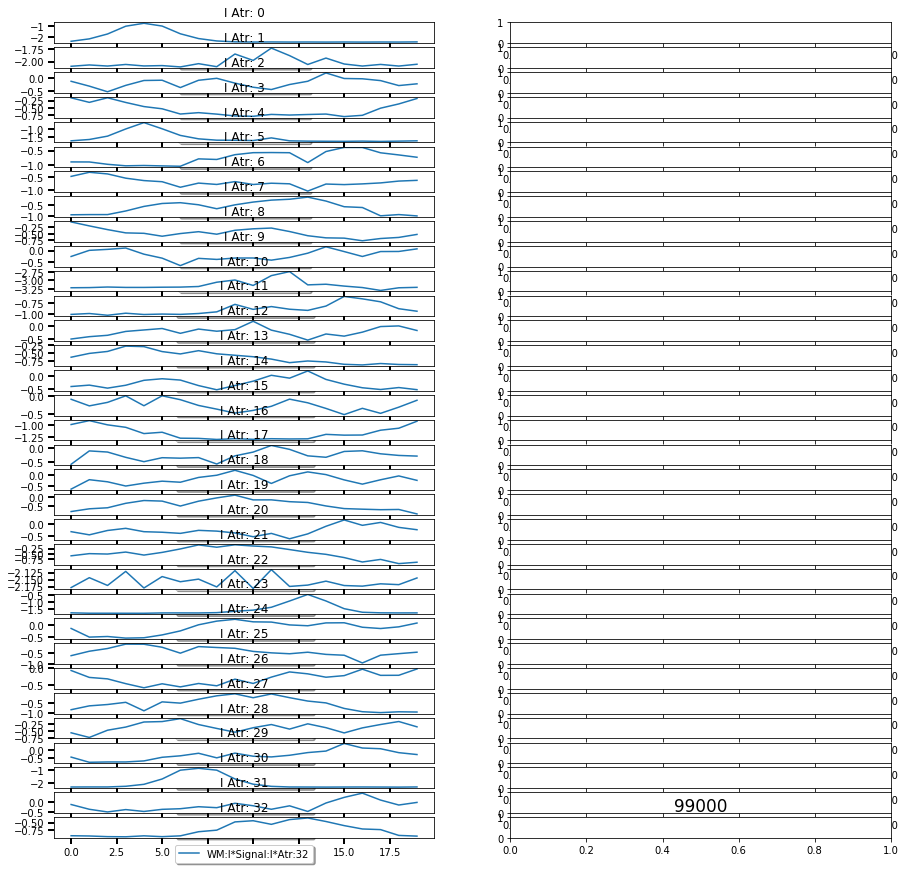

In [18]:
for x in range(episodes):
        
    # Initial state
    current_state = random.randint(0, size_of_maze - 1)
    start = current_state
    current_signal = np.random.choice(signals)
    eligibility *= 0.0
    
    if episodic_memory:
        episode_memory = []
    
    changed = False
    
    # Set the goal for the tast
    if x%non_obs_task_switch_rate == 0:
        non_obs = choice([i for i in range(len(goals)) if i not in [non_obs]])
        changed = True
    if num_obs_tasks == 1:
        goal = goals[non_obs][0]
    else:
        goal = goals[non_obs][signals.index(current_signal)]
        
    steps = 0
    opt_steps = get_opt_steps(current_state, goal, size_of_maze)
    
    # Start testing phase
    if testing == False and x > ((episodes*percent_check) / 10):
        start_testing()
        
    for y in range(steps_till_quit):
        if create_plots:
            threshold_vals += [threshold]
        if (current_state == goal):
            encode_str = build_hrr_string(current_wm, current_signal, str(current_state) + reward_tkn(), current_atr)
            goal_hrr = ltm.encode(encode_str)
            goal_value = np.dot(weights, goal_hrr) + bias
            
            if episodic_memory:
                episode_memory += [[current_state, goal_value, goal]]

            error = reward_good - goal_value
            eligibility *= eli_lambda
            eligibility = eligibility + goal_hrr
            weights = np.add(weights, (alpha * logmod(error) * eligibility))
            
            if dynamic_threshold:
                threshold += threshold_alpha * logmod(error)
                
            atr_values[current_atr] += atr_alpha * logmod(error)
            
            if create_plots:
                total_goal_error += [error]
            
            if(debug):
                print("In goal with value {0}".format(goal_value))
            
            break
            
        # Store info about previous state      
        previous_wm = current_wm
        previous_signal = current_signal
        previous_state = current_state
        previous_atr = current_atr
        
        if debug:
            print("Previous WM:, {0}, Signal:, {1}, State, {2}, ATR:, {3}".format(previous_wm, previous_signal, previous_state, previous_atr))
        
        encode_str = build_hrr_string(previous_wm, previous_signal, previous_state, previous_atr)
        previous_state_hrr = ltm.encode(encode_str)
        previous_value = np.dot(weights, previous_state_hrr) + bias
        
        if debug:
            print("Started with state: {0}, State Value: {1}, WM: {2},  Atr: {3}".format(previous_state, previous_value, previous_wm, previous_atr))
            
        current_signal = "I"
        left, right = get_moves(previous_state, size_of_maze)
        if previous_signal != "I":
            previous_signal += "In"
            
        # Make the move
        move, wm, current_atr, random_move = move_policy(goal, [left, right], [previous_wm, previous_signal], [current_signal], previous_atr, rand_on)
        steps += 1
        current_wm = wm
        current_state = move
        
        if random_move:
            eligibility *= 0.0
            
        if(debug):
            print("Moves {0}, taken {1}".format([left, right], move))
            
        if debug:
            print("Current WM {0}, Current Signal {1}, Current state {2}, Current ATR {3}".format(current_wm, current_signal, current_state, current_atr))
            
        if current_state == goal:
            encode_str = build_hrr_string(current_wm, current_signal, str(current_state) + reward_tkn(), current_atr)     
            if debug:
                print("In goal: WM: {1}, ATR: {2}".format(current_wm, current_atr))
        else:
            encode_str = build_hrr_string(current_wm, current_signal, current_state, current_atr)
            
        current_state_hrr = ltm.encode(encode_str)
        current_value = np.dot(weights, current_state_hrr) + bias
        
        sarsa_error = (reward_bad + discount * current_value) - previous_value
        eligibility *= eli_lambda
        eligibility = eligibility + previous_state_hrr
        weights = np.add(weights, (alpha * logmod(sarsa_error) * eligibility))

        atr_values[current_atr] += atr_alpha * logmod(sarsa_error)
        
        if dynamic_threshold:
            threshold += threshold_alpha * logmod(sarsa_error)
        
        if create_plots:
            total_error += [sarsa_error]
            norm_error += [sarsa_error]
        
        if sarsa_error > fabs(threshold) or sarsa_error < -fabs(threshold):
            
            if np.mean(atr_values) < atr_threshold:
                reset()
            
            if create_plots:
                switch_error += [sarsa_error]
            
            if create_plots:
                if testing and sarsa_error > fabs(threshold):
                    pos_err_store += [sarsa_error]
                elif testing and sarsa_error < -fabs(threshold):
                    neg_err_store += [sarsa_error]
                
            if sarsa_error > fabs(threshold):
                current_atr = context_policy_positive(current_wm, current_signal, current_state, current_atr)
            elif sarsa_error < -fabs(threshold):
                current_atr = context_policy_negative(previous_atr)
            
            eligibility *= 0.0
            
            if changed:
                steps = 0
                start = current_state
                opt_steps = get_opt_steps(current_state, goal, size_of_maze)
                
            if(debug):
                print("Changed atr from {0} to {1}".format(previous_atr, current_atr))
                
        if debug:
            input("")
        
    if testing:
        if current_state == goal:
            step_store += [steps - opt_steps]
        else:
            step_store += [steps_till_quit]
            
    update_progress(x / episodes, x)
    if (x%1000) == 0:
        plot_all_graphs(True, x)  
    
    if live_graph:
        plt.pause(0.001)
    
update_progress(1, episodes)

In [19]:


# end_time = time.time()
# print("Total time: {0} minutes".format((end_time - start_time)/60))

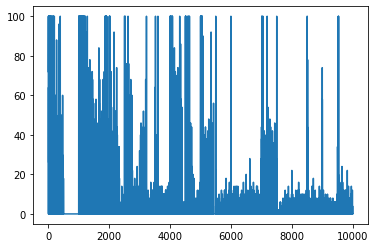

63.62636263626363


In [20]:


plot_graph(step_store)
accuracy = (len(step_store)-np.count_nonzero(step_store))*100.0 / len(step_store)
print(accuracy)

/home/nibraas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


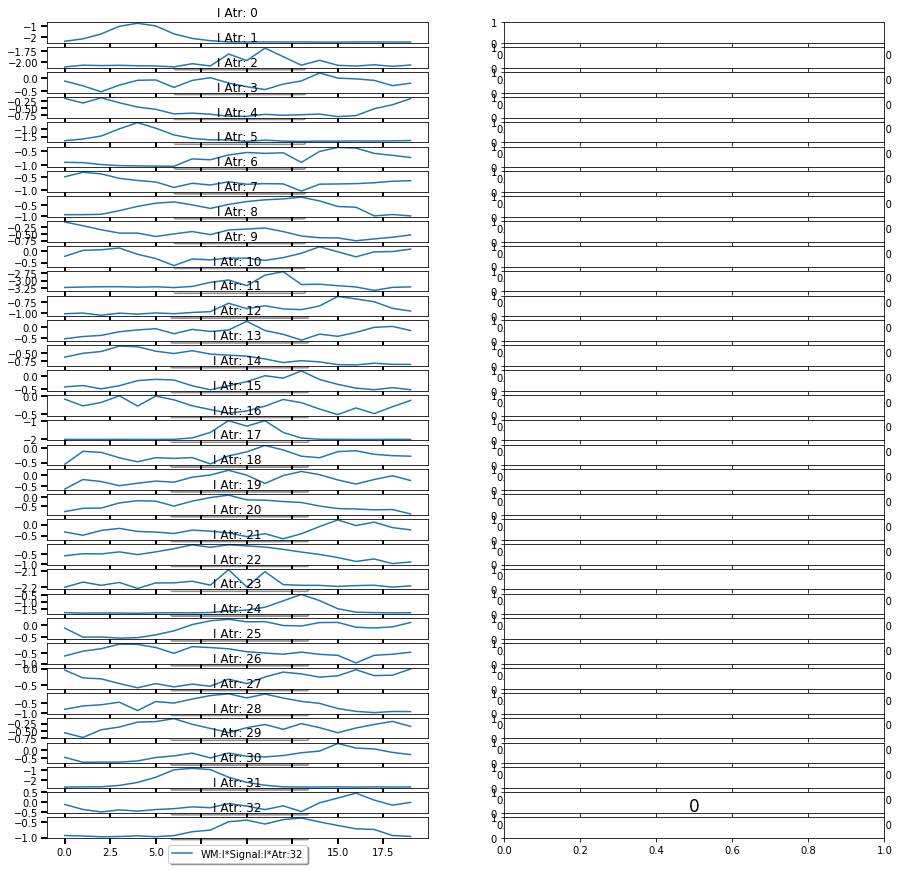

In [21]:


plot_all_graphs()

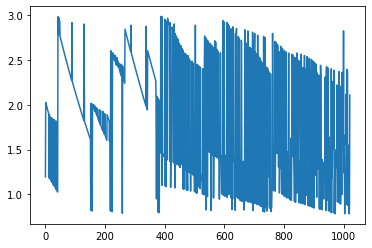

In [22]:


if create_plots:
    plot_graph(pos_err_store)

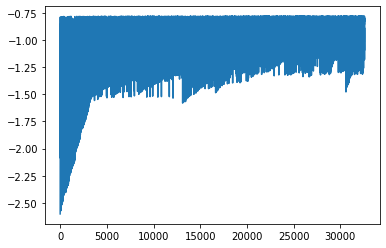

In [23]:


if create_plots:
    plot_graph(neg_err_store)

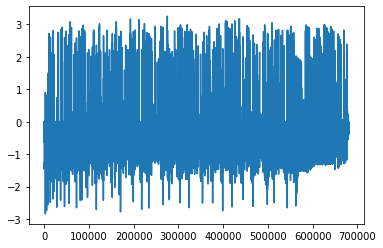

In [24]:


if create_plots:
    plot_graph(total_error)

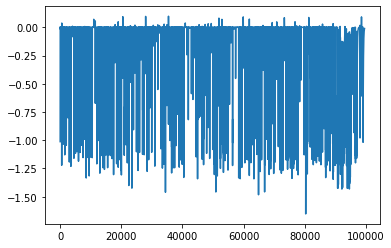

In [25]:


if create_plots:
    plot_graph(total_goal_error)

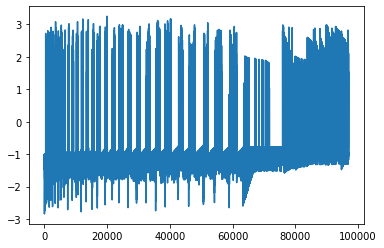

In [26]:


if create_plots:
    plt.plot(switch_error)

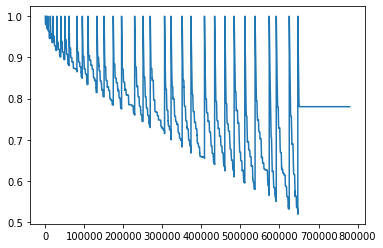

In [27]:


if create_plots:
    plot_graph(threshold_vals)

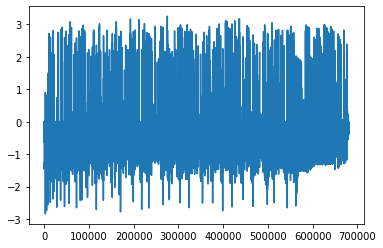

In [28]:
if create_plots:
    plot_graph(norm_error)

In [29]:


print(atr_values)

[-0.14875464955920525, -0.15246092240707235, -0.10468016379024815, -0.12960843876334327, -0.1281326081644595, -0.1352119175973362, -0.1452358947241855, -0.14463296536018627, -0.11359600715568674, -0.10266053775519086, -0.4168944268463581, -0.15492186629882496, -0.08840109330378063, -0.1440774628193485, -0.09426092657339429, -0.11191191164463289, -0.1415588241231759, -0.11231084473477139, -0.09497234756128063, -0.13046640372531632, -0.117041742580338, -0.13265396464031912, -0.14420569165757507, -0.1380721624543851, -0.08620039835547402, -0.1220345610128855, -0.10683619770192047, -0.12540057169988958, -0.12203576318785367, -0.11454120482638529, -0.14692424488938588, -0.10108986747365267, -0.14048391971658689]


In [30]:


# hrr_length

In [31]:


# ltm.count()

In [32]:


# seed_val

In [33]:
ltm.count()

918